In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Csv Data Load
marathon_results_2015 = pd.read_csv("./boston-results/marathon_results_2015.csv")
marathon_results_2016 = pd.read_csv("./boston-results/marathon_results_2016.csv")
marathon_results_2017 = pd.read_csv("./boston-results/marathon_results_2017.csv")

In [11]:
# Add "Year" Column
marathon_results_2015["Year"] = '2015'
marathon_results_2016["Year"] = '2016'
marathon_results_2017["Year"] = '2017'

# Sum Data
marathon_2015_2017 = pd.concat([marathon_results_2015,marathon_results_2016,marathon_results_2017],ignore_index = True, sort=False)

In [12]:
marathon_2015_2017

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,Year,Unnamed: 8
0,0.0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,...,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1,2015,NaN
1,1.0,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,...,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2,2015,NaN
2,2.0,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,...,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3,2015,NaN
3,3.0,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,...,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4,2015,NaN
4,4.0,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,...,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5,2015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79633,26405.0,25166,"Steinbach, Paula Eyvonne",61,F,Ontario,CA,USA,NaN,MI,...,5:55:18,6:46:57,0:16:24,-,7:09:39,26407,11972,344,2017,NaN
79634,26406.0,25178,"Avelino, Andrew R.",25,M,Fayetteville,NC,USA,NaN,MI,...,5:53:48,6:54:21,0:16:40,-,7:16:59,26408,14436,4774,2017,NaN
79635,26407.0,27086,"Hantel, Johanna",57,F,Malvern,PA,USA,NaN,NaN,...,6:00:33,6:54:38,0:16:47,-,7:19:37,26409,11973,698,2017,NaN
79636,26408.0,25268,"Reilly, Bill",64,M,New York,NY,USA,NaN,MI,...,6:06:07,6:56:08,0:16:49,-,7:20:44,26410,14437,1043,2017,NaN


In [13]:
marathon_2015_2017.info()
#Drop Columns
marathon_2015_2017 = marathon_2015_2017.drop(['Unnamed: 0','Unnamed: 9','Unnamed: 8','Bib','Citizen'],axis="columns")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79638 entries, 0 to 79637
Data columns (total 27 columns):
Unnamed: 0       53008 non-null float64
Bib              79638 non-null object
Name             79638 non-null object
Age              79638 non-null int64
M/F              79638 non-null object
City             79637 non-null object
State            70645 non-null object
Country          79638 non-null object
Citizen          3440 non-null object
Unnamed: 9       158 non-null object
5K               79638 non-null object
10K              79638 non-null object
15K              79638 non-null object
20K              79638 non-null object
Half             79638 non-null object
25K              79638 non-null object
30K              79638 non-null object
35K              79638 non-null object
40K              79638 non-null object
Pace             79638 non-null object
Proj Time        79638 non-null object
Official Time    79638 non-null object
Overall          79638 non-null int6

In [14]:
#Official Time,5K,10K,15K...40K,pace (H:M:S) --> (S) - type: int64
col=["Official Time","5K","10K","15K","20K","Half","25K","30K","35K","40K","Pace"]
for i in col:
    marathon_2015_2017[i] = pd.to_timedelta(marathon_2015_2017[i])
    marathon_2015_2017[i] = marathon_2015_2017[i].astype("m8[s]").astype(np.int64)
# 'm8[s]' 는 초를 나타내는 데이터 타입
marathon_2015_2017.head()

,Name,Age,M/F,City,State,Country,5K,10K,15K,20K,...,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,Year
0,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,883,1783,2697,3629,...,5520,6479,7359,296,-,7757,1,1,1,2015
1,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,883,1783,2698,3628,...,5519,6479,7362,298,-,7788,2,2,2,2015
2,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,883,1783,2697,3629,...,5520,6479,7381,299,-,7822,3,3,3,2015
3,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,883,1784,2701,3629,...,5520,6483,7427,300,-,7847,4,4,4,2015
4,"Korir, Wesley",32,M,Kitale,NaN,KEN,883,1784,2698,3628,...,5520,6479,7407,300,-,7849,5,5,5,2015


In [15]:
#Save to csv
marathon_2015_2017.to_csv("./data/marathon_2015_2017.csv",index=None,header=True)

In [9]:
#Column , Bar Chart
#Comparison와 Ranking
USA_runner = marathon_2015_2017[marathon_2015_2017.Country == "USA"]

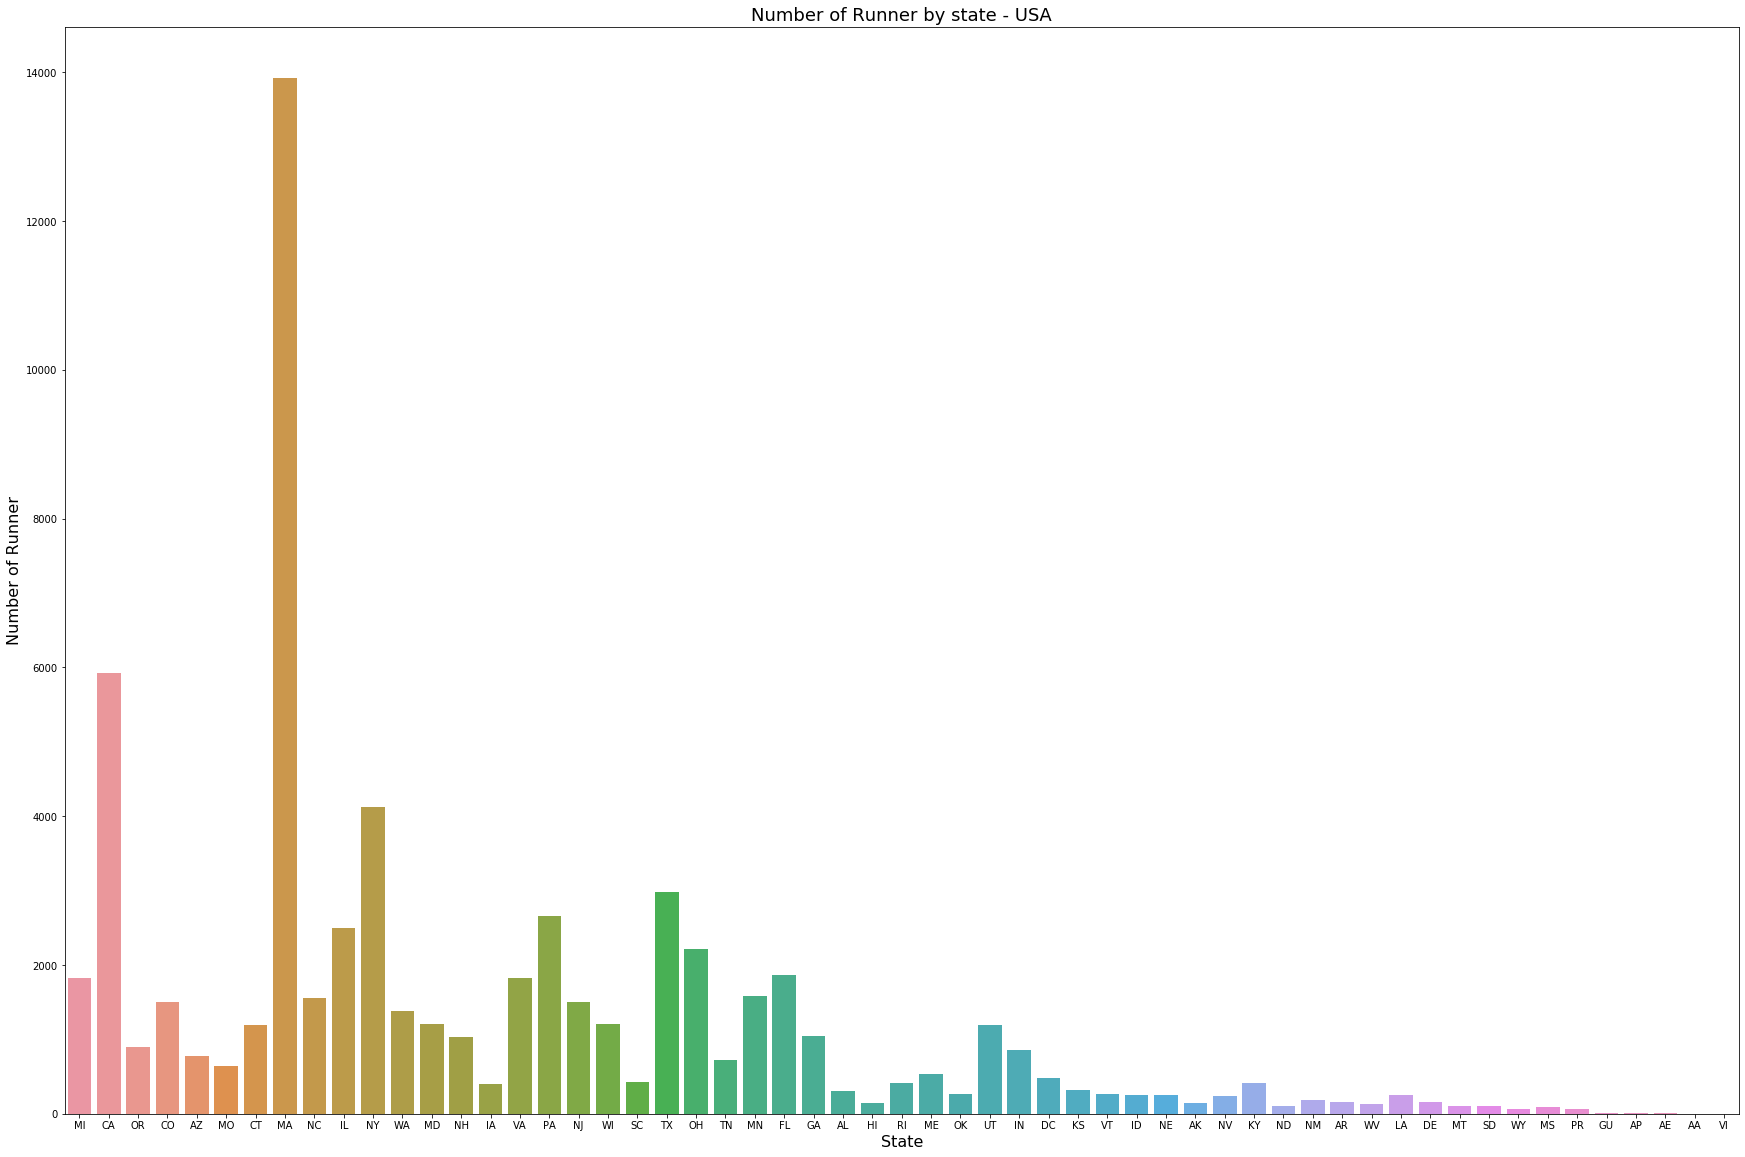

In [10]:
# figure Size
plt.figure(figsize=(30,20))
#countplot - seaborn에서 갯수를 세주는 plot을 만드는 것
#지역별 참석 비율
runner_state = sns.countplot("State",data=USA_runner)
runner_state.set_title("Number of Runner by state - USA",fontsize= 18)
runner_state.set_xlabel("State",fontdict={"size":16})
runner_state.set_ylabel("Number of Runner",fontdict={'size':16})
plt.show()

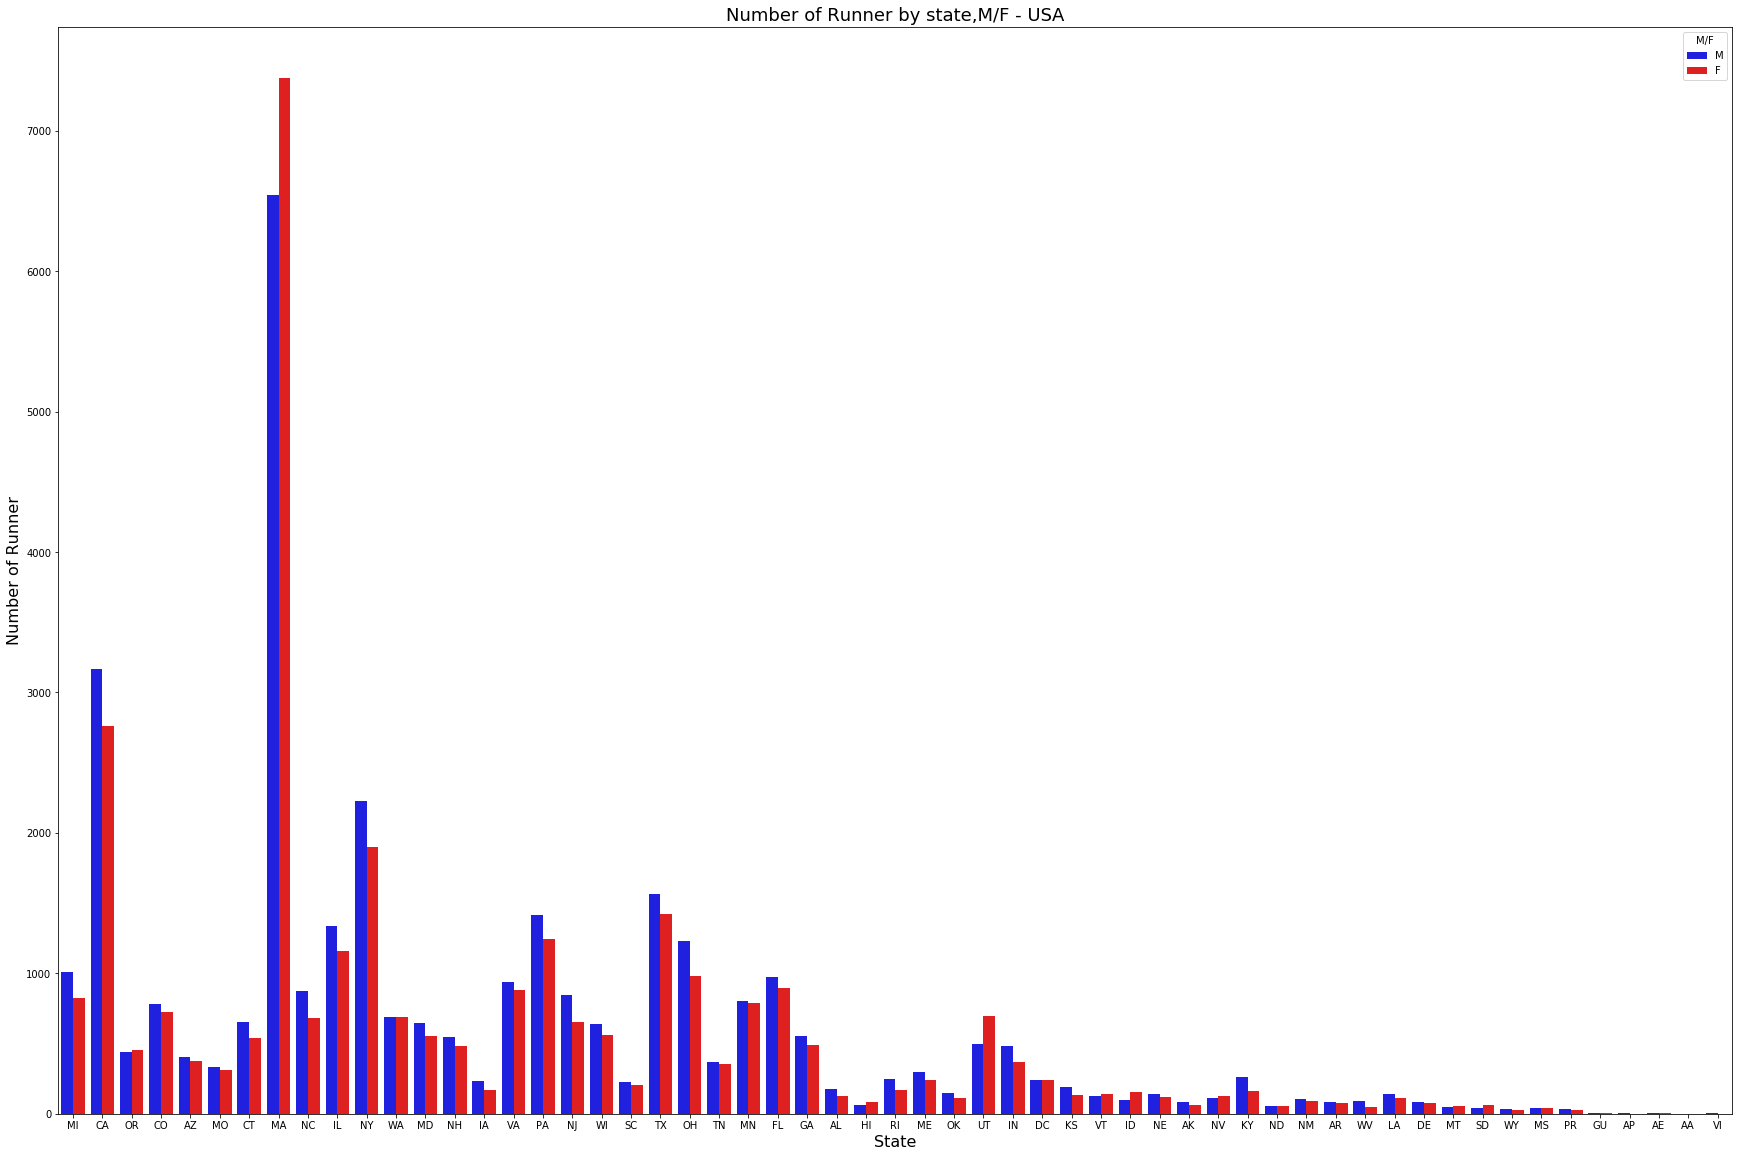

In [11]:
# figure Size
plt.figure(figsize=(30,20))
#지역별로 남녀 참여 비율
runner_state = sns.countplot("State",data=USA_runner,hue='M/F',palette={'F':'r','M':'b'})
runner_state.set_title("Number of Runner by state,M/F - USA",fontsize= 18)
runner_state.set_xlabel("State",fontdict={"size":16})
runner_state.set_ylabel("Number of Runner",fontdict={'size':16})
plt.show()

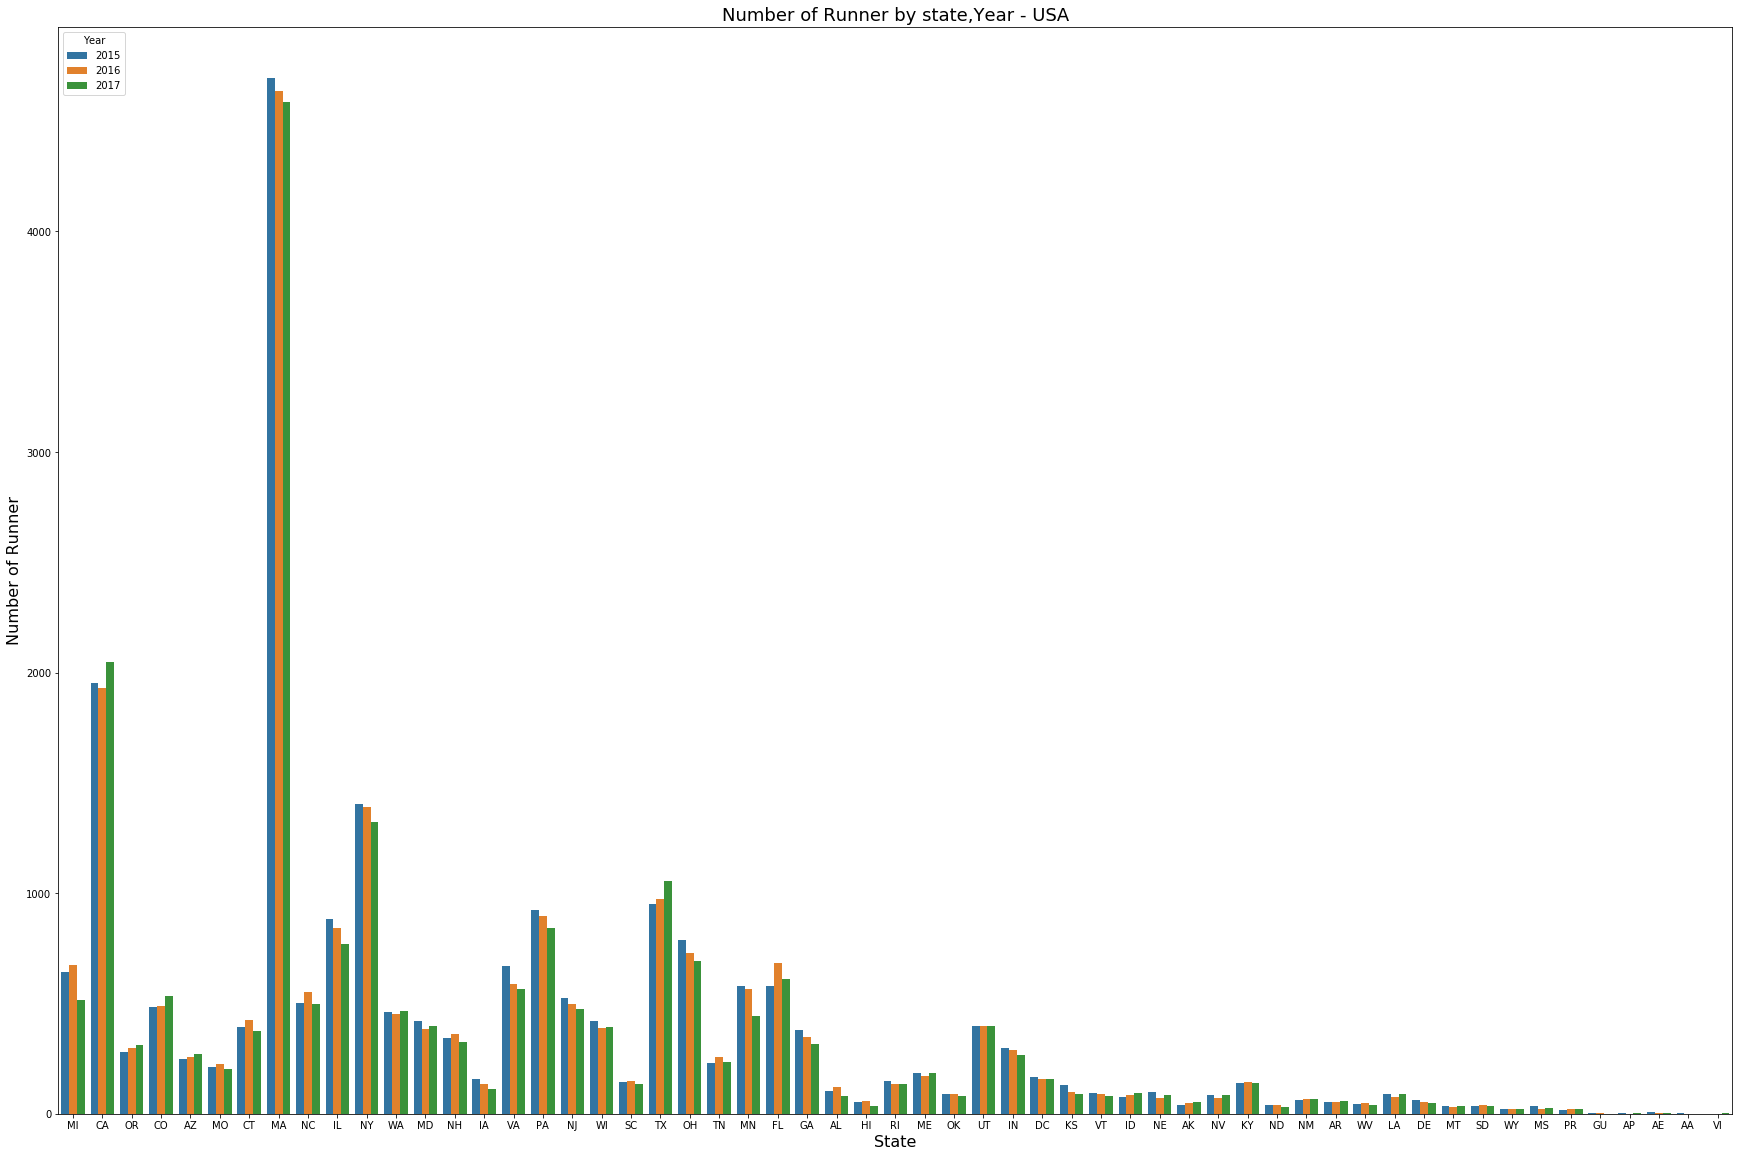

In [12]:
plt.figure(figsize=(30,20))
runner_state = sns.countplot("State",data=USA_runner,hue="Year")
runner_state.set_title("Number of Runner by state,Year - USA",fontsize= 18)
runner_state.set_xlabel("State",fontdict={"size":16})
runner_state.set_ylabel("Number of Runner",fontdict={'size':16})
plt.show()

In [ ]:
plt.close()

In [13]:
#Dual Axis, Pareto Chart
#Pareto Chart
#나이대별 참석 Bar Chart와 비율. Line Chart
runner_1860 = marathon_2015_2017[marathon_2015_2017.Age.isin(range(18,60))]
runner_1860_counting = runner_1860["Age"].value_counts()

In [35]:
#Sort by Age
runner_age = pd.DataFrame({
    'Age' : runner_1860_counting.index,
    'Count' : runner_1860_counting
})
runner_age_sort = runner_age.sort_values(by='Age')

x = runner_age_sort['Age']
#18부터 다시 정렬되기때문에 str로 다바꿔줘야함
x = [str(i) for i in x]
y = runner_age_sort['Count']

ratio = y/y.sum()
#cumsum은 누적시킴
ratio_sum = ratio.cumsum()
y_ratio = [i for i in ratio_sum]

NameError: name 'x' is not defined

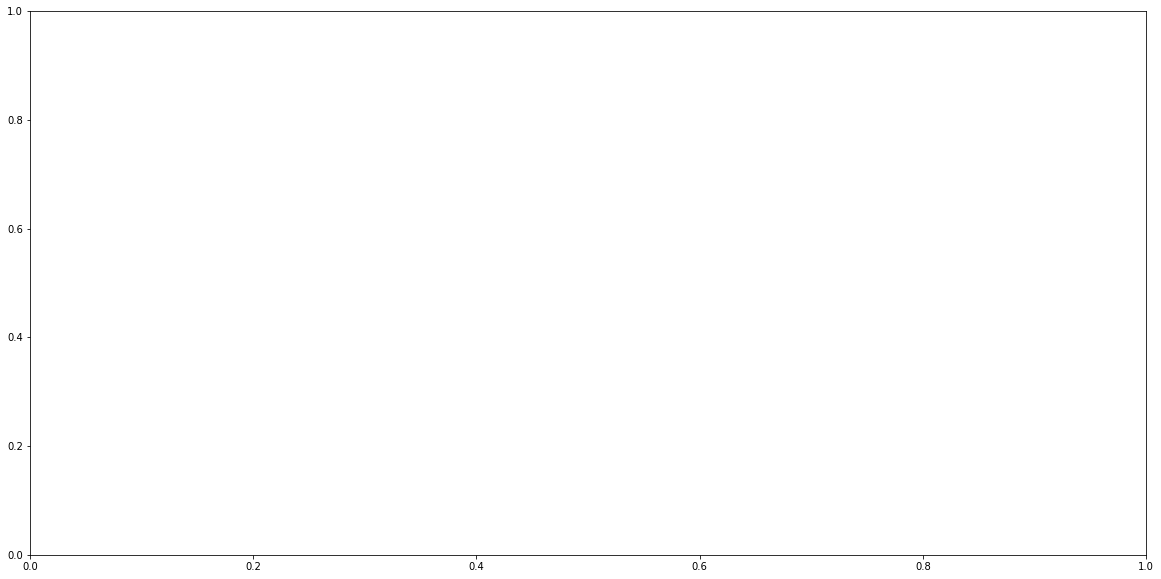

In [8]:
fig, barChart = plt.subplots(figsize=(20,10))
#Create Barchart
barChart.bar(x,y)
#Create Line Chart
lineChart = barChart.twinx() #twinx()는 공유하는 x축을 나타냄
lineChart.plot(x,ratio_sum,'-ro',alpha=0.5) #alpha는 투명도
#오른쪽 레이블(LineChart의 레이블)을 직접 만들어주어야함
ranges = lineChart.get_yticks()
lineChart.set_yticklabels(["{:,.1%}".format(x) for x in ranges])
#선위에 있는 값을 만들기
ratio_sum_per = ['{0:.0%}'.format(x) for x in ratio_sum]

for i,txt in enumerate(ratio_sum_per):
    lineChart.annotate(txt, (x[i],y_ratio[i]),fontsize=14) #annotate는 차트위에 보여주는 것

barChart.set_xlabel("Age", fontdict={'size':16})
barChart.set_ylabel("Number of Runner", fontdict={'size':16})
plt.title("Dual Axis - Number of Runner by Age", fontsize=18)
plt.show()

In [9]:
plt.close()

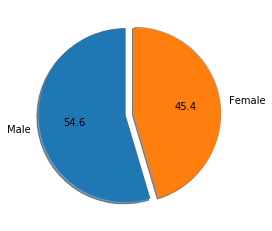

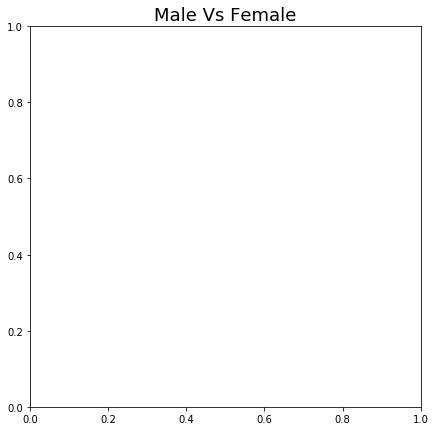

In [46]:
#Pie Chart
labels = 'Male','Female'
explode= (0,0.1)

plt.pie(marathon_2015_2017['M/F'].value_counts(),explode=explode,labels=labels,startangle = 90, shadow=True,autopct='%.1f')
plt.figure(figsize=(7,7))
plt.title("Male Vs Female",fontsize=18)
plt.show()

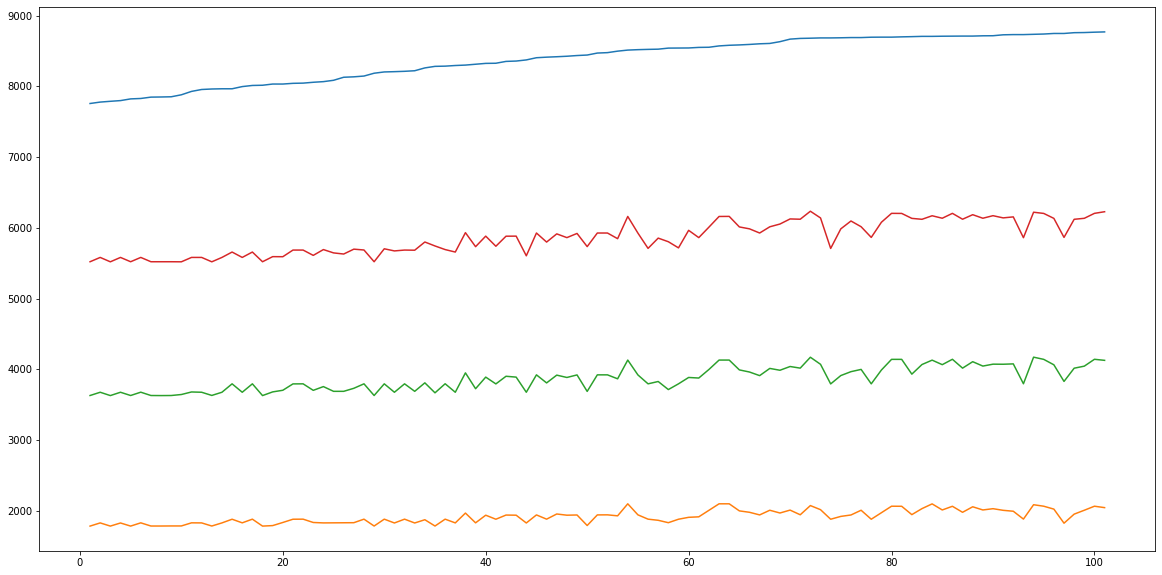

In [22]:
#Line Chart

record = pd.DataFrame(marathon_2015_2017,columns = ['5K','10K','15K','20K','Half','25K','30K','35K','40K','Official Time']).sort_values(by=['Official Time'])

record.insert(0,'Rank',range(1,1+len(record)))
top100 = record[0:101]

xData = top100.Rank
yData_full = top100['Official Time']
yData_10K = top100['10K']
yData_20K = top100['20K']
yData_30K = top100['30K']

plt.figure(figsize=(20,10))
plt.plot(xData,yData_full)
plt.plot(xData,yData_10K)
plt.plot(xData,yData_20K)
plt.plot(xData,yData_30K)

plt.show()

In [8]:
#Scatter Chart(산포도 차트)
#(나이와 성별) 과 Official Time의 연관관계
#--> 후에 Linear Regression을 수행 --> 예상 성적

mRunner = marathon_2015_2017[marathon_2015_2017['M/F']=='M']
fRunner = marathon_2015_2017[marathon_2015_2017['M/F']=='F']

In [18]:
x_male = mRunner.Age
y_male = mRunner['Official Time']
x_female = fRunner.Age
y_female = fRunner['Official Time']

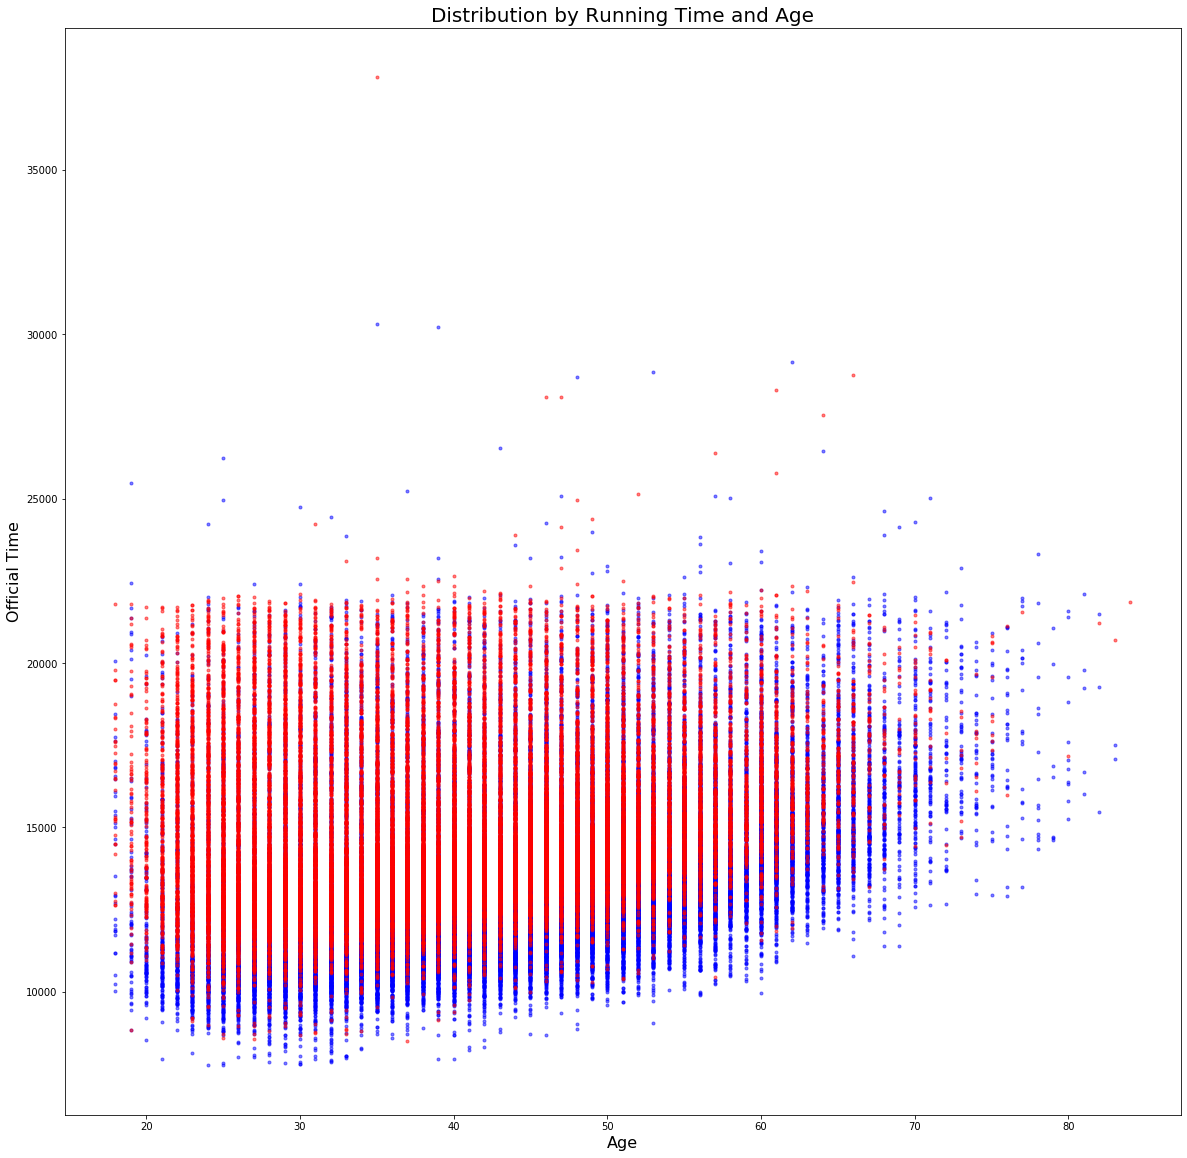

In [26]:
plt.figure(figsize=(20,20))
plt.plot(x_male,y_male,'.',color='b',alpha=0.5)
plt.plot(x_female,y_female,'.',color='r',alpha=0.5)

plt.xlabel("Age",fontsize=16)
plt.ylabel("Official Time",fontsize=16)
plt.title("Distribution by Running Time and Age",fontsize=20)
plt.show()

In [62]:
#Buuble Chart
#제품,국가 등등 그룹을 나타날때 점의 사이즈업 버블을 이용해 정보를 나타냄
#마라톤 2시간 지난이후에 사람들이 얼마나 어느지점에 있는지 확인하는 그래프

marathon_2017 = marathon_2015_2017[marathon_2015_2017['Year']=='2017']
marathon_2017 = pd.DataFrame(marathon_2017,columns=['M/F','5K','10K','15K','20K','25K','30K','35K','40K'])
marathon_2017 = marathon_2017.reset_index(drop=True)

In [64]:
#Check_time에 따라 위치(Lat,Long)표시
check_time = 7200
Lat = 0
Long = 0
Location = ''
points = [[42.247835,-71.474357], [42.274032,-71.423979], [42.282364,-71.364801], [42.297870,-71.284260], 
          [42.324830,-71.259660], [42.345680,-71.215169], [42.352089,-71.124947], [42.351510,-71.086980]]
marathon_location = pd.DataFrame(columns=['Lat',"Long"])
arr= [['40K',7],['35K',6],['30K',5],['25K',4],['20K',3],['15K',2],['10K',1],['5K',0]]
for i,record in marathon_2017.iterrows():
    for dis,dex in arr:
        if record[dis] < check_time:
            Lat = points[dex][0]
            Long = points[dex][1]
            break
        else:
            Lat = points[0][0]
            Long = points[0][1]
            
    marathon_location = marathon_location.append({"Lat" : Lat,
                                                 "Long":Long},ignore_index=True)

In [66]:
#각 위치별 인원수 Count
marathon_count = marathon_location.groupby(['Lat','Long']).size().reset_index(name='Count')

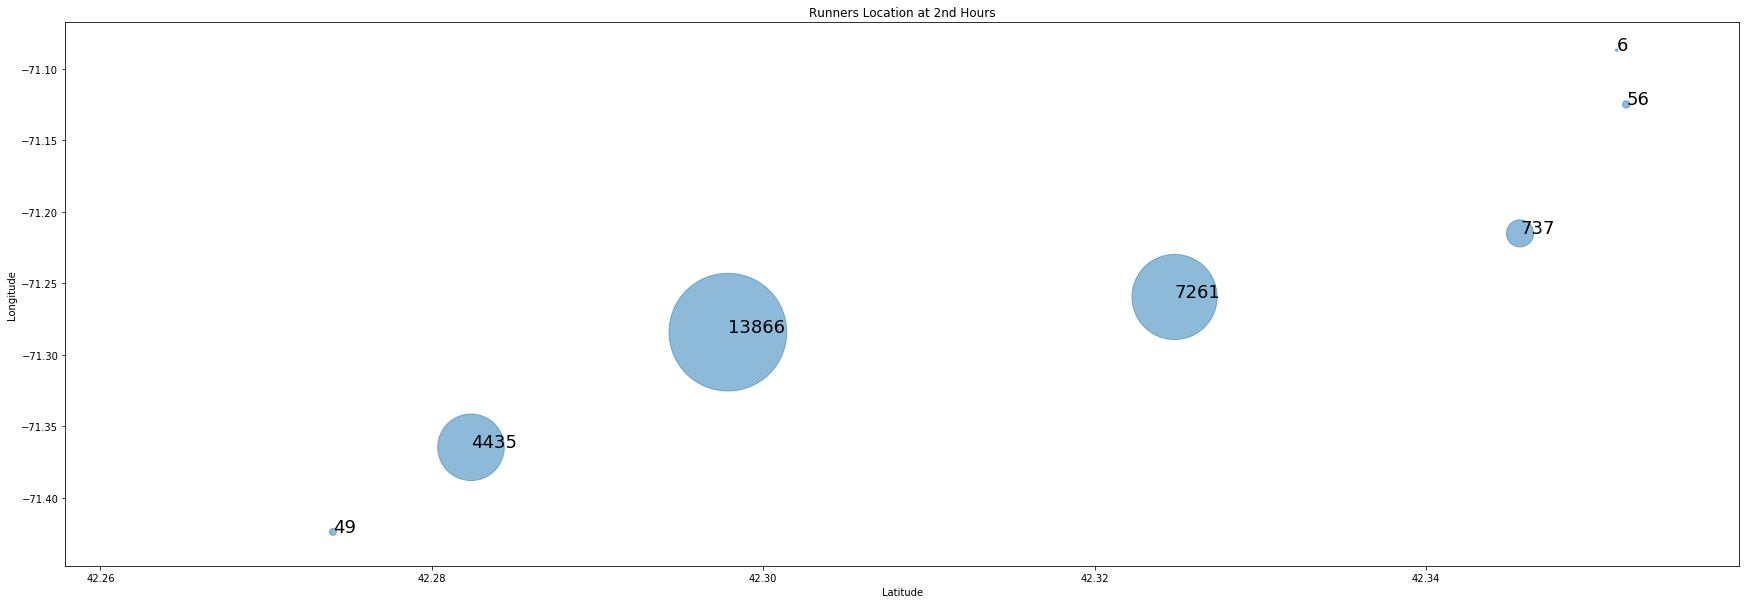

In [69]:
plt.figure(figsize = (30,10))
plt.scatter(marathon_count.Lat,marathon_count.Long, s=marathon_count.Count,alpha=0.5)

for i, txt in enumerate(marathon_count.Count):
    plt.annotate(txt,(marathon_count.Lat[i],marathon_count.Long[i]),fontsize=18)

plt.title("Runners Location at 2nd Hours")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [26]:
#HeatMap Chart
#60세 이하의 참가자 중에서 연령대,성별에 따라 가장 많이 참가하는 수

sns.set()

In [27]:
marathon_under60 = marathon_2015_2017[marathon_2015_2017.Age.isin(range(0,60))]
marathon = marathon_under60.groupby('Age')["M/F"].value_counts().unstack().fillna(0)

#stack --> 세로축에 있던것을 가로축으로
#Unstack --> 가로축에 있던것을 세로축으로

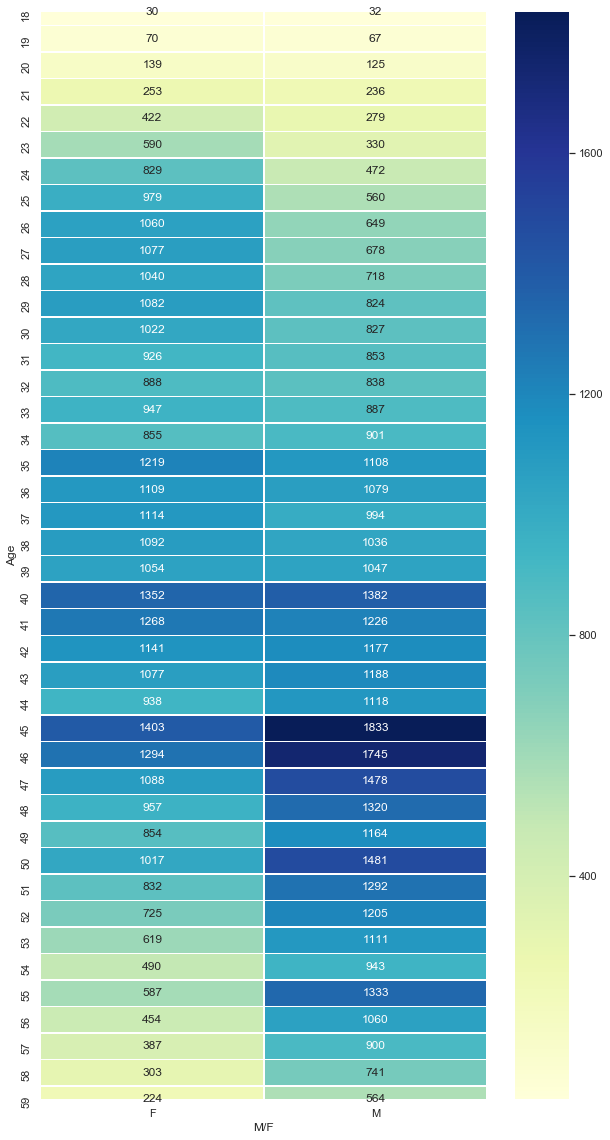

In [30]:
f,ax = plt.subplots(figsize=(10,20))
sns.heatmap(marathon,annot=True,fmt='d',linewidths=.5,ax=ax,cmap="YlGnBu")

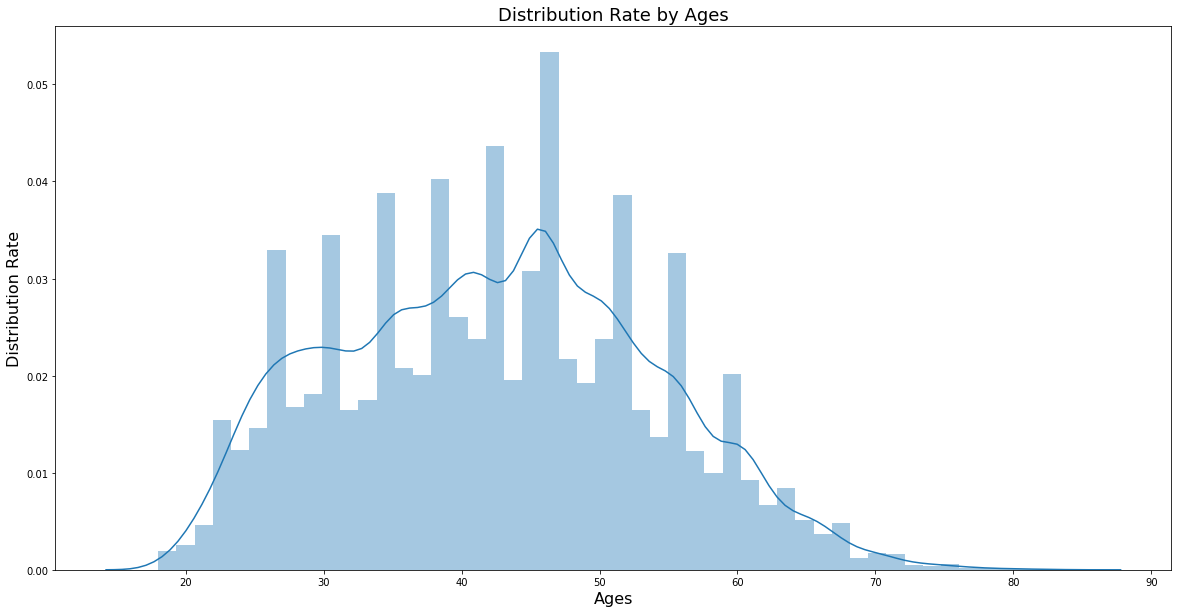

In [19]:
#Histogram Chart
plt.figure(figsize=(20,10))

age_count = sns.distplot(marathon_2015_2017.Age)
age_count.set_xlabel("Ages",fontdict={'size':16})
age_count.set_ylabel("Distribution Rate",fontdict={'size':16})
age_count.set_title("Distribution Rate by Ages",fontsize=18)
plt.show()

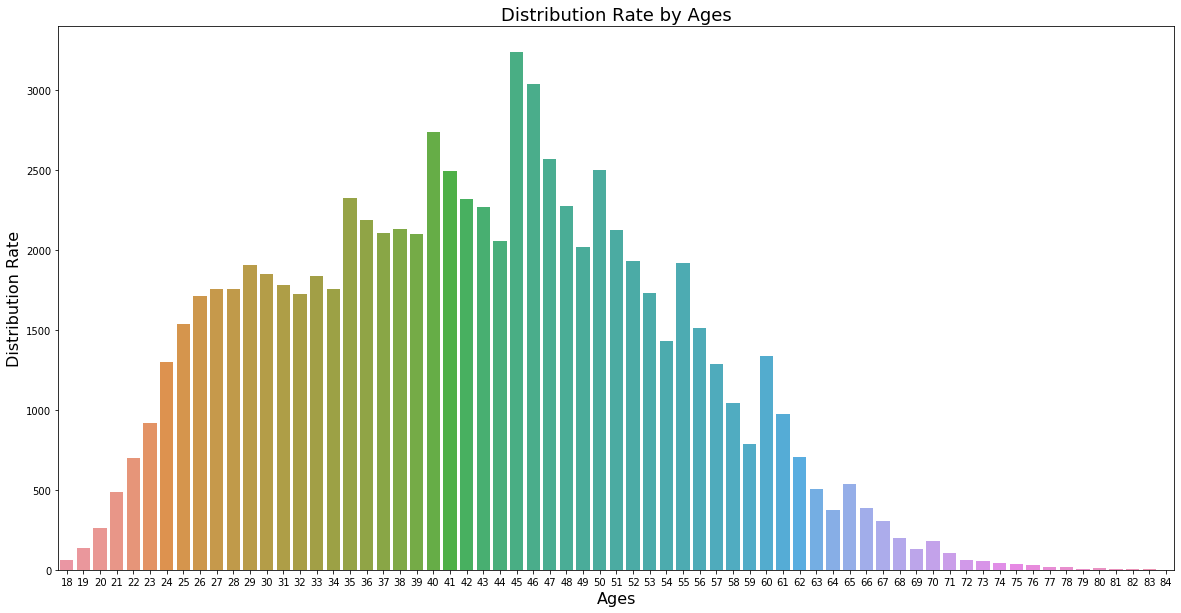

In [20]:
plt.figure(figsize=(20,10))

age_count = sns.countplot('Age',data=marathon_2015_2017)
age_count.set_xlabel("Ages",fontdict={'size':16})
age_count.set_ylabel("Distribution Rate",fontdict={'size':16})
age_count.set_title("Distribution Rate by Ages",fontsize=18)
plt.show()

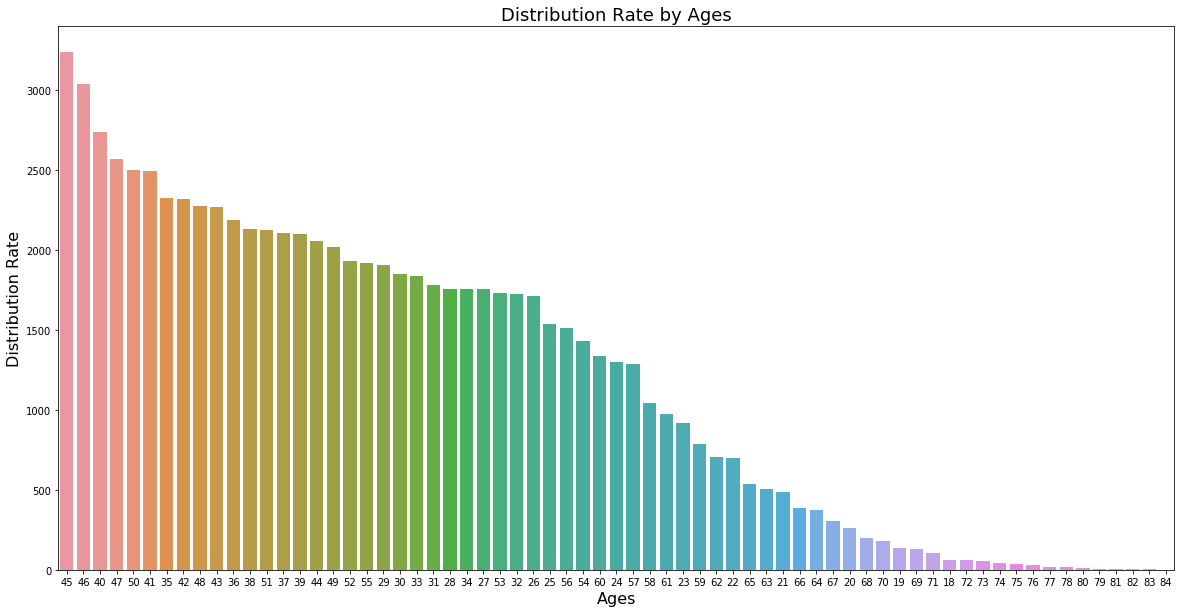

In [21]:
plt.figure(figsize=(20,10))

age_count = sns.countplot('Age',data=marathon_2015_2017,order=marathon_2015_2017['Age'].value_counts().index)
age_count.set_xlabel("Ages",fontdict={'size':16})
age_count.set_ylabel("Distribution Rate",fontdict={'size':16})
age_count.set_title("Distribution Rate by Ages",fontsize=18)
plt.show()

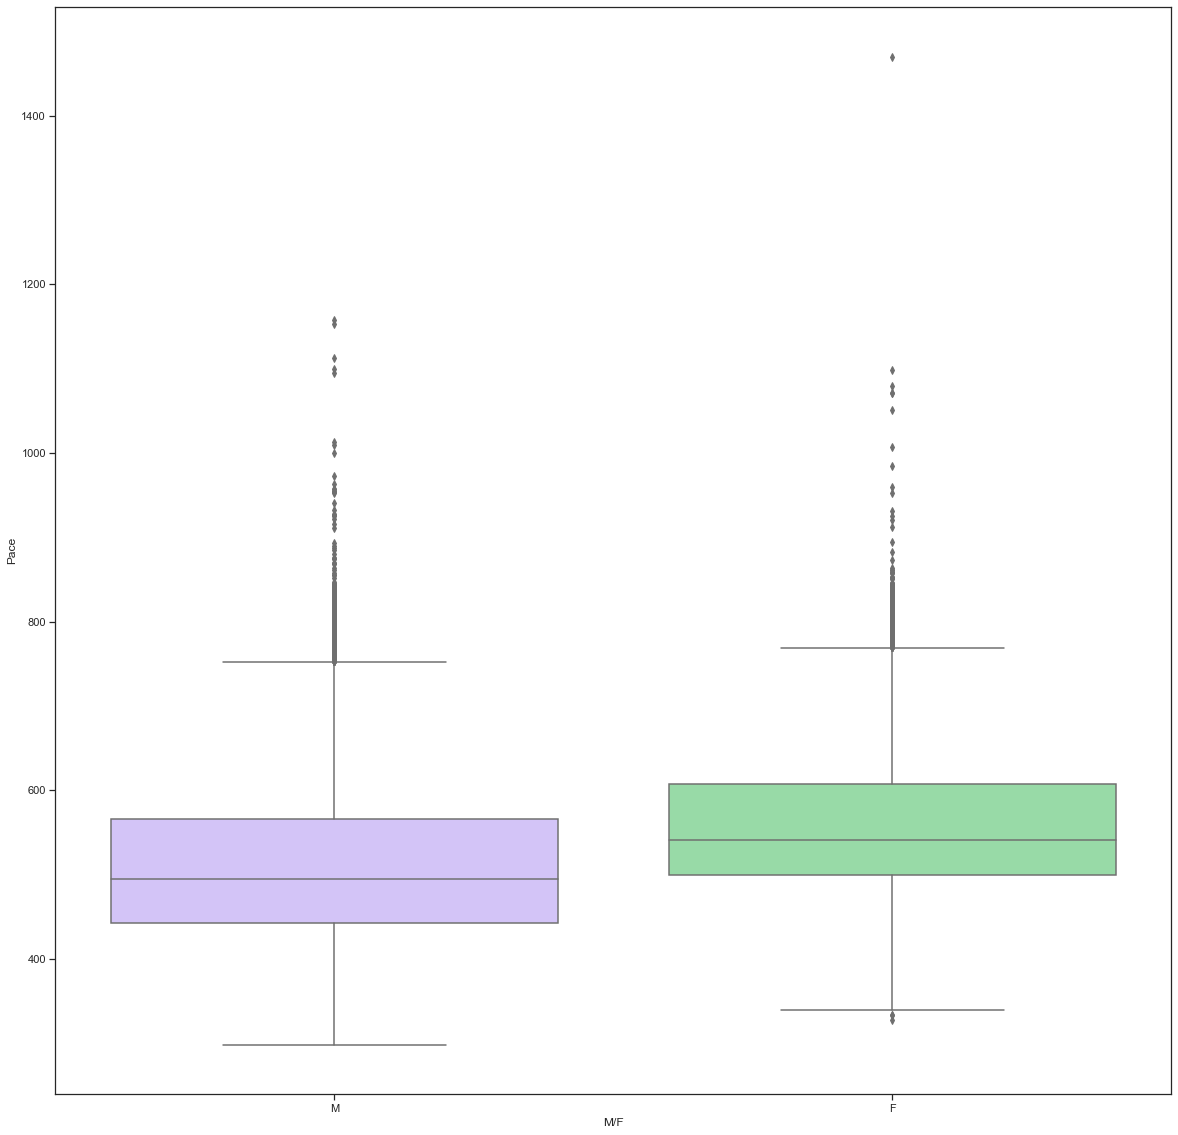

In [32]:
#Box Plot
USA_runner = marathon_2015_2017[marathon_2015_2017.Country=='USA']
male = USA_runner[USA_runner["M/F"]=="M"]
female = USA_runner[USA_runner['M/F']=='F']

#draw Graph
plt.figure(figsize=(20,20))
sns.set(style='ticks',palette = 'pastel')
sns.boxplot(x='M/F',y='Pace',palette=['m','g'],data=USA_runner)
plt.show()

In [33]:
#describe --> R에서 Summary() 와 같음
#--> 평균,최대,최소,4분위수
maleDescribe=male['Pace'].describe()
maleDescribe

count    33390.00000
mean       514.22944
std         97.99571
min        298.00000
25%        442.00000
50%        495.00000
75%        566.00000
max       1157.00000
Name: Pace, dtype: float64

In [37]:
#Geo Chart - folium 외부 라이브러리 사용
marathon_2017 = marathon_2015_2017[marathon_2015_2017['Year']=='2017']
marathon_2017 = pd.DataFrame(marathon_2017,columns=['M/F','5K','10K','15K','20K','25K','30K','35K','40K'])
marathon_2017 = marathon_2017.reset_index(drop=True)

In [38]:
check_time = 7200
Lat = 0
Long = 0
Location = ''
points = [[42.247835,-71.474357], [42.274032,-71.423979], [42.282364,-71.364801], [42.297870,-71.284260], 
          [42.324830,-71.259660], [42.345680,-71.215169], [42.352089,-71.124947], [42.351510,-71.086980]]
marathon_location = pd.DataFrame(columns=['Lat',"Long"])
arr= [['40K',7],['35K',6],['30K',5],['25K',4],['20K',3],['15K',2],['10K',1],['5K',0]]
for i,record in marathon_2017.iterrows():
    for dis,dex in arr:
        if record[dis] < check_time:
            Lat = points[dex][0]
            Long = points[dex][1]
            break
        else:
            Lat = points[0][0]
            Long = points[0][1]
            
    marathon_location = marathon_location.append({"Lat" : Lat,
                                                 "Long":Long},ignore_index=True)

In [40]:
marathon_location_Count = marathon_location.groupby(["Lat","Long"]).size().reset_index(name='Count')

Text(0, 0.5, 'Longitude')

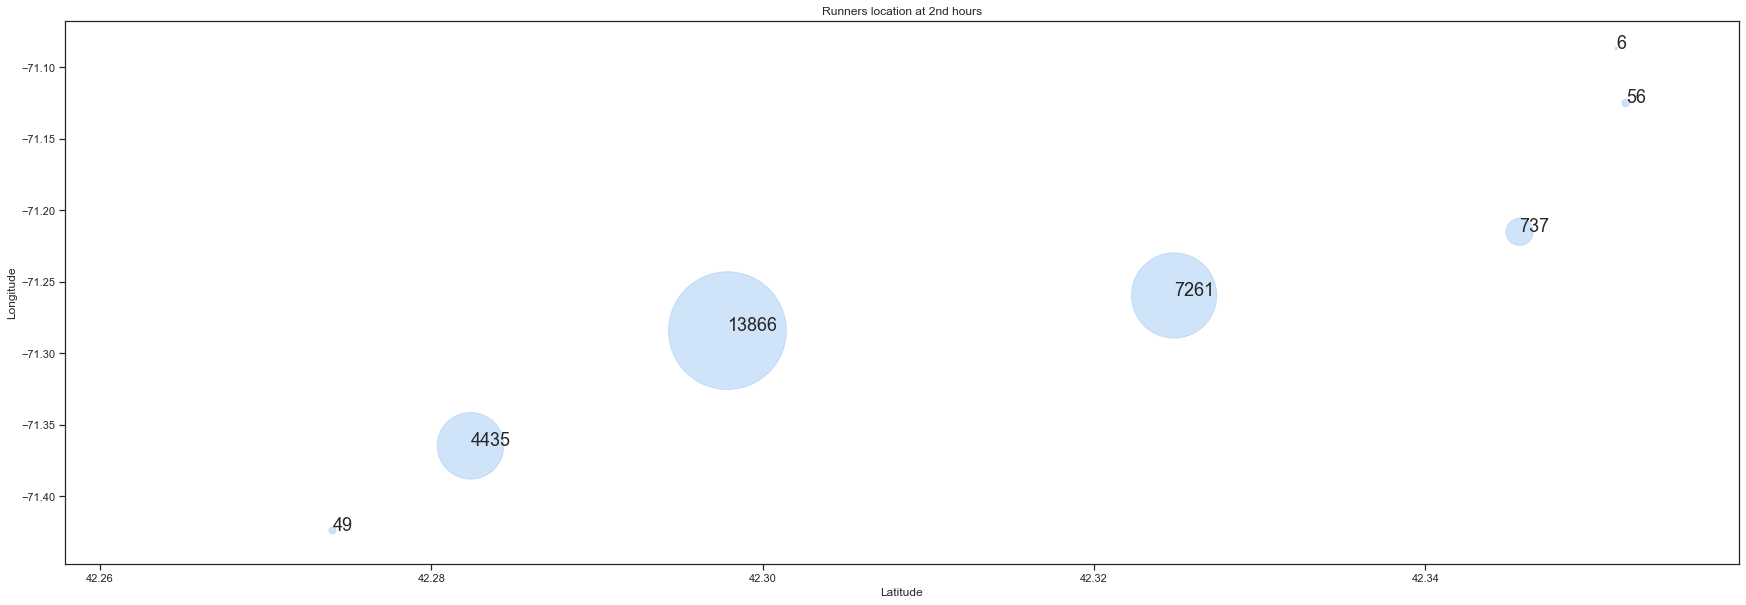

In [41]:
#Bubble Chart를 먼저 만듬
plt.figure(figsize=(30,10))
plt.scatter(marathon_location_Count.Lat,marathon_location_Count.Long,
           s=marathon_location_Count.Count, alpha=0.5)

for i,txt in enumerate(marathon_location_Count.Count):
    plt.annotate(txt,(marathon_location_Count.Lat[i],marathon_location_Count.Long[i]),fontsize=18)
    
plt.title('Runners location at 2nd hours')
plt.xlabel("Latitude")
plt.ylabel("Longitude")

In [44]:
import folium
from folium.plugins import HeatMap

marathon_map = folium.Map(lcocation=[42.324830,-71.259660],
                         tiles='OpenStreetMap',
                         zoom_start = 11)
HeatMap(marathon_location_Count, radius=20).add_to(marathon_map)

marathon_map